# te

> Data from te

In [ ]:
#| default_exp data.te

In [ ]:
#| exporti
import pandas as pd
import requests

USER_AGENT = {'User-agent': 'Mozilla/5.0'}

TICKER_MAP = {
    'spx:ind': '/spx:ind'
}

def _get_auth_token(auth_url):
    full_auth_url = 'https://tradingeconomics.com' + auth_url
    print(full_auth_url)

    r = requests.get(full_auth_url, headers=USER_AGENT)
    auth_token = r.text.split("""    TESecurify = """)[1][:100].split('\'')[1]
    return auth_token

def _get_data(s, auth_url, auth_token, span=None, d1=None, d2=None, interval=None):
    data_url = 'https://markets.tradingeconomics.com/chart?'
    data_url += f's={s}&'
    if span != None:
        data_url += f'span={span}&'
    elif (d1 != None) & (d2 != None):
        data_url += f'd1={d1}&'
        data_url += f'd2={d2}&'
    else:
        data_url += f'span=max&'
    if interval != None:
        data_url += f'interval={interval}&'
    data_url += f'securify=new&'
    data_url += f'url={auth_url}&'
    data_url += f'AUTH={auth_token}&'
    data_url += f'ohlc=0'
    
    # print(data_url)

    r = requests.get(data_url, headers=USER_AGENT)
    df = pd.DataFrame.from_dict(r.json()['series'][0]['data'])
    
    return df

In [ ]:
#| export
def get_data(ticker):
    auth_url = TICKER_MAP[ticker]
    auth_token =_get_auth_token(auth_url)
    data = _get_data(ticker, auth_url, auth_token)
    return data

In [ ]:
get_data('spx:ind')

https://tradingeconomics.com/spx:ind


,date,x,y,percentChange,change
0,1928-01-03T00:00:00,-1325289600000,17.57000,NaN,NaN
1,1928-02-01T00:00:00,-1322784000000,17.26000,-1.764371,-0.31000
2,1928-03-01T00:00:00,-1320278400000,19.13000,10.834299,1.87000
3,1928-04-02T00:00:00,-1317513600000,19.75000,3.240983,0.62000
4,1928-05-01T00:00:00,-1315008000000,20.00000,1.265823,0.25000
...,...,...,...,...,...
1135,2022-08-01T00:00:00,1659312000000,3955.00000,-4.244012,-175.29000
1136,2022-09-01T00:00:00,1661990400000,3585.62000,-9.339570,-369.38000
1137,2022-10-03T00:00:00,1664755200000,3871.98000,7.986345,286.36000
1138,2022-11-01T00:00:00,1667260800000,4080.11000,5.375286,208.13000


https://tradingeconomics.com/spx:ind


<AxesSubplot: xlabel='date'>

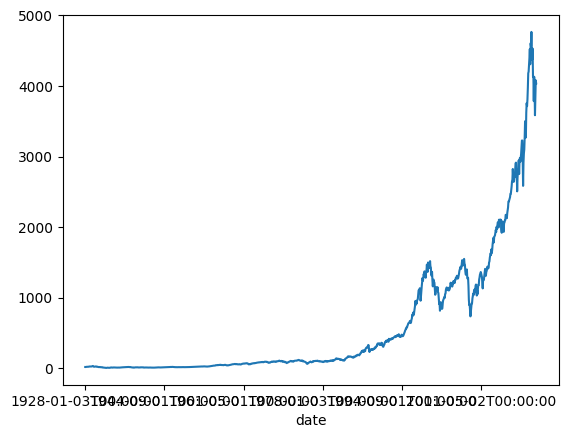

In [ ]:
get_data('spx:ind').set_index('date')['y'].plot()

In [ ]:
# s='foo:ind'
# auth_url='/spx:ind'

# auth_token =_get_auth_token(auth_url)
# df = _get_data(s, auth_url, auth_token)

# df.date

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()